# Dataset Cleaning and Merging

by Nan BAI

In [1]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib

args = Namespace(
    # Data and Path information
    save_dir = 'data_storage/',
    image_dir = 'data_storage/images/'
)

## For Original Dataset of Tripoli

### Data Imports

In [21]:
size_df = pd.read_csv('Tripoli/data_storage/GEOLOCATION.csv',sep=';')

In [60]:
size_df['index'] = size_df['PhotoId'].astype(str)

In [61]:
size_df

,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted,index
0,30866445 N00,"34,435237","35,843922",378083,30866445 N00,Esther Dyson,T,T1,378083,Tripoli (Lebanon) street scene,shopping alley in Tripoli,"Lebanon,shopping,market,sunglasses,Tripoli",08/09/2004 13:51,08/09/2004 20:51,378083
1,30866445 N00,"34,436678","35,844236",452228,30866445 N00,Esther Dyson,T,T1,452228,chess players in Tripoli,NaN,"Tripoli,Lebanon,April2004,chess players,chess",15/09/2004 16:17,15/09/2004 23:17,452228
2,30866445 N00,"34,435171","35,84415",452229,30866445 N00,Esther Dyson,T,T1,452229,children playing in Tripoli,so much for politics!,"Tripoli,Lebanon,April2004,children",15/09/2004 16:17,15/09/2004 23:17,452229
3,89816840 N00,"34,434144","35,844583",550247,89816840 N00,jack unrau,T,T2,550247,tripoli,October 2002.,"tripoli,lebanon,city",22/10/2002 07:21,24/09/2004 13:29,550247
4,15574596 N00,"34,426022","35,819601",4043396,15574596 N00,Nick,T,T3,4043396,From Istanbul to Cairo,"Sunday down on the beach, Tripoli, Lebanon","lebanon,tripoli",31/01/2005 13:30,31/01/2005 13:30,4043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,92663284 N00,"34,433333","35,85",23582293739,92663284 N00,RudolfFuji,T,T185,23582293739,"Tripoli, Lebanon",NaN,NaN,06/10/2015 17:08,24/12/2015 20:18,23582293739
1195,61354839 N06,"34,45543","35,81095",23720135132,61354839 N06,Helmut Schönberger,T,T184,23720135132,Blick aus Jusufs Haus,NaN,NaN,01/08/1977 00:00,18/12/2015 15:02,23720135132
1196,61354839 N06,"34,4545","35,812999",23720144522,61354839 N06,Helmut Schönberger,T,T184,23720144522,Dia Libanon 10,NaN,NaN,01/08/1977 00:00,18/12/2015 15:02,23720144522
1197,61354839 N06,"34,4545","35,812999",23720258532,61354839 N06,Helmut Schönberger,T,T184,23720258532,Karawanserei in El Mina,NaN,NaN,01/08/1977 00:00,18/12/2015 15:09,23720258532


In [51]:
def load_images_from_category_folders(images_folder):
    all_images = {}
    all_imgs = []
    categories = []
    category_dict = {}
    for file in os.listdir(images_folder):
        if os.path.isdir(images_folder + '/' + file):
            print(file)
            categories.append(file)
            category_dict[len(category_dict)] = file
            all_images[file] = []
            for f in os.listdir(images_folder + '/' + file):
                if os.path.splitext(f)[1].lower() in ('.jpg', '.jpeg', '.png'):
                    all_images[file].append(f)
                    all_imgs.append((f, file, len(categories)))
    return all_images, all_imgs, categories, category_dict

In [52]:
images_folder = 'Tripoli/data_storage/images'
all_images_dict, all_images, categories, cat_dict = load_images_from_category_folders(images_folder)

architectural elements
form
gastronomy
interior
landscape scenery and natural features
monuments
people
product
urban scenery


In [44]:
len(all_images)

902

In [56]:
img_df = pd.DataFrame(all_images).rename(columns = {0:'image name', 1: 'category', 2: 'cat_id'})

In [57]:
img_df['index'] = img_df['image name'].apply(lambda x: x[:-4])

In [58]:
img_df

,image name,category,cat_id,index
0,10447040743.jpg,architectural elements,1,10447040743
1,11410917615.jpg,architectural elements,1,11410917615
2,11410942296.jpg,architectural elements,1,11410942296
3,11410960914.jpg,architectural elements,1,11410960914
4,11411050763.jpg,architectural elements,1,11411050763
...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073
898,8754214344.jpg,urban scenery,9,8754214344
899,8754216854.jpg,urban scenery,9,8754216854
900,9526228212.jpg,urban scenery,9,9526228212


In [71]:
size_df = img_df.merge(size_df, how = 'left', left_on= 'index', right_on='index')

In [72]:
size_df

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07
1,11410917615.jpg,architectural elements,1,11410917615,81483104 N07,"34,439701","35,859298",1.141092e+10,81483104 N07,Rita Kalindjian,L,L154,1.141092e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:17,17/12/2013 00:21
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58


In [73]:
size_df.to_csv('Tripoli/data_storage/Photo_sizes.csv',sep='\t')

In [75]:
size_df = pd.read_csv('Tripoli/data_storage/Photo_sizes.csv',sep='\t',index_col='Unnamed: 0')
size_df

,image name,category,cat_id,index,UserId,Lat,Long,PhotoId,ID,Name,Nationality,Num,PhotoID,Title,Description,User tags,Time taken,Time posted
0,10447040743.jpg,architectural elements,1,10447040743,10880980 N08,"34,433248","35,844612",1.044704e+10,10880980 N08,Sara Helwe,L,L148,1.044704e+10,The Abandoned School,Photo/editing by me\n© Sara Helwe Digital Arts,"old,vintage,school,abandoned,stairs,staircase,...",28/01/2013 12:18,23/10/2013 21:07
1,11410917615.jpg,architectural elements,1,11410917615,81483104 N07,"34,439701","35,859298",1.141092e+10,81483104 N07,Rita Kalindjian,L,L154,1.141092e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:17,17/12/2013 00:21
2,11410942296.jpg,architectural elements,1,11410942296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11410960914.jpg,architectural elements,1,11410960914,81483104 N07,"34,435683","35,842903",1.141096e+10,81483104 N07,Rita Kalindjian,L,L154,1.141096e+10,DSC_5739Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:16,17/12/2013 00:23
4,11411050763.jpg,architectural elements,1,11411050763,81483104 N07,"34,438464","35,841673",1.141105e+10,81483104 N07,Rita Kalindjian,L,L154,1.141105e+10,Old Window-Tripoli Lebanon,NaN,NaN,15/12/2013 12:21,17/12/2013 00:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,8509557073.jpg,urban scenery,9,8509557073,28490141 N03,"34,425556","35,835539",8.509557e+09,28490141 N03,rabiem22,L,L114,8.509557e+09,A Slice of Tripoli,NaN,"Tripoli,Lebanon,North,Buildings,Posters,Cars,C...",17/02/2013 14:27,26/02/2013 15:55
898,8754214344.jpg,urban scenery,9,8754214344,37641030 N06,"34,433333","35,844333",8.754214e+09,37641030 N06,sakkaoui,L,L134,8.754214e+09,"Tripoli, quartiers de Jessrine et Abou Samra",NaN,NaN,04/05/2013 09:29,19/05/2013 13:35
899,8754216854.jpg,urban scenery,9,8754216854,37641030 N06,"34,433333","35,844333",8.754217e+09,37641030 N06,sakkaoui,L,L134,8.754217e+09,"Tripoli, vue sur les souks",NaN,NaN,04/05/2013 09:45,19/05/2013 13:36
900,9526228212.jpg,urban scenery,9,9526228212,45000408 N05,"34,433047","35,843812",9.526228e+09,45000408 N05,Next Stop Bjursele,T,T157,9.526228e+09,"Tripoli, Lebanon",NaN,"Tripoli,Lebanon,citadel",21/04/2013 13:27,16/08/2013 18:58


In [54]:
cat_dict

{0: 'architectural elements',
 1: 'form',
 2: 'gastronomy',
 3: 'interior',
 4: 'landscape scenery and natural features',
 5: 'monuments',
 6: 'people',
 7: 'product',
 8: 'urban scenery'}

The small data has a maximum index of 5000 during the data collection period, in the case of Suzhou, it reaches the maximum of 4230

In [3]:
size_df['index'] = size_df['index'].astype(str)

In [4]:
len(size_df['index'].unique())

4230

Only the data with downloadable marks are kept for further analysis

In [5]:
df = size_df[size_df['candownload']==1]

In [6]:
df

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url
8,51859675789,1.0,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,57210421@N04,"Beijing, China",灭渡桥,,0.0,2022-02-03 13:33:40,0.0,0.0,[],31.290855,120.641824,NaN,https://www.flickr.com/photos/wishingbone/5185...
9,51859339946,1.0,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,57210421@N04,"Beijing, China",灭渡桥,,0.0,2022-02-03 13:34:07,0.0,0.0,[],31.290855,120.641824,NaN,https://www.flickr.com/photos/wishingbone/5185...
10,51858385807,1.0,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,57210421@N04,"Beijing, China",灭渡桥,,0.0,2022-02-03 13:34:18,0.0,0.0,[],31.290855,120.641824,NaN,https://www.flickr.com/photos/wishingbone/5185...
11,51859339546,1.0,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,57210421@N04,"Beijing, China",灭渡桥,,0.0,2022-02-03 13:34:52,0.0,0.0,[],31.290855,120.641824,NaN,https://www.flickr.com/photos/wishingbone/5185...
12,51858385377,1.0,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,57210421@N04,"Beijing, China",灭渡桥,,0.0,2022-02-03 13:38:02,2.0,0.0,[],31.290855,120.641824,NaN,https://www.flickr.com/photos/wishingbone/5185...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,38397950426,1.0,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,28571579@N03,NaN,20171112_IMG_0515,NaN,0.0,2017-11-12 19:33:08,11.0,0.0,[],31.320080,120.597258,NaN,https://www.flickr.com/photos/george8189/38397...
4226,38397948496,1.0,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,28571579@N03,NaN,20171112_IMG_0518,NaN,0.0,2017-11-12 19:33:52,16.0,0.0,[],31.319936,120.597441,NaN,https://www.flickr.com/photos/george8189/38397...
4227,38454117381,1.0,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,28571579@N03,NaN,20171112_IMG_0531,NaN,0.0,2017-11-12 19:40:39,18.0,0.0,[],31.320094,120.597633,NaN,https://www.flickr.com/photos/george8189/38454...
4228,38397940256,1.0,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,28571579@N03,NaN,20171112_IMG_0539,NaN,0.0,2017-11-12 19:45:07,7.0,0.0,[],31.320402,120.597236,NaN,https://www.flickr.com/photos/george8189/38397...


In [17]:
df.iloc[0].url

'https://www.flickr.com/photos/wishingbone/51859675789/'

### Data Cleaning and Processing

#### Finding Locals and Neighbourhoods

The data are distributed in NaN different neighbourhoods in Suzhou (which is missing from the dataset), posted by 95 different owners, among which 5 are people based in mainland of China, due to their indicated locations in Flickr user profile, who contributed 450 posts

In [7]:
df['neighbourhood'].unique()

array([nan])

In [8]:
len(df['neighbourhood'].unique())

1

In [9]:
df['owner_loc'].unique()

array(['Beijing, China', nan, 'Valencia, España', 'Singapore, Singapore',
       'Gif-sur-Yvette, France', '台中, 台灣', 'Boston, US', 'France',
       'San Jose, CA., USA', 'Hong Kong', 'Vancouver BC, Canada',
       'Sydney, Australia', 'San Francisco, America',
       'Guandong Chunshan 中山 , China 中國 ', 'Urdorf, Switzerland',
       'Kokomo, IN, USA', 'Scotts Valley, USA', 'Paris, France',
       'Shanghai, China', 'Australia', 'Birmingham, UK',
       'Hong Kong, Hong Kong', 'Brussels, Belgium', 'Milan',
       'Nanaimo, Canada', 'Tuxedo Park, USA'], dtype=object)

In [10]:
locations = [now for now in list(df['owner_loc'].unique()) if 'china' in str(now).lower()]
locations

['Beijing, China', 'Guandong Chunshan 中山 , China 中國 ', 'Shanghai, China']

In [11]:
df['local'] = df['owner_loc'].apply(lambda x: x in locations)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\1482302024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local'] = df['owner_loc'].apply(lambda x: x in locations)


In [12]:
len(df[df['local']]['owner'].unique())

5

In [13]:
len(df[df['local']])

450

In [14]:
len(df['owner'].unique())

95

#### Processing Tags and Converting to lists

In [15]:
import re
re.findall(r'_content\': \'([a-zA-Z]+)',df['tags'].iloc[0])

[]

In [18]:
df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\1574953216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))


In [19]:
df['tag_len'] = df['tag_list'].apply(lambda x: len(x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\1455675285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_len'] = df['tag_list'].apply(lambda x: len(x))


#### Filtering out Erotic images

In [20]:
df['NOT'] = df['tag_list'].apply(lambda x: 'erotic' in x)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\4184844319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NOT'] = df['tag_list'].apply(lambda x: 'erotic' in x or 'nude' in x)


In [21]:
df = df[~df['NOT']]

#### Generating Timestamps for the posts

In [22]:
df['year'] = df['taken'].apply(lambda x: int(x[:4]))

In [23]:
df['time'] = df['taken'].apply(pd.Timestamp)

In [24]:
df['week'] = df['time'].apply(lambda x: x.week)

In [25]:
df['unique_week'] = df['year'] * 100 + df['week']

In [26]:
len(df['unique_week'].unique())

117

In [27]:
df['year'].unique()

array([2022, 2021, 2010, 2015, 2007, 2019, 2012, 2020, 2014, 2013, 2018,
       2016, 2017], dtype=int64)

In [29]:
df['tag_len'].unique()

array([ 0,  6,  1,  4,  2,  5, 28, 25,  3, 18, 26, 22,  8,  9, 24,  7, 11,
       14, 16, 17, 13, 10, 32, 27, 20, 33, 34, 12, 15], dtype=int64)

In [28]:
df

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,neighbourhood,url,local,tag_list,tag_len,NOT,year,time,week,unique_week
8,51859675789,1.0,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:33:40,5,202205
9,51859339946,1.0,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:34:07,5,202205
10,51858385807,1.0,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:34:18,5,202205
11,51859339546,1.0,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:34:52,5,202205
12,51858385377,1.0,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:38:02,5,202205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,38397950426,1.0,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,28571579@N03,NaN,20171112_IMG_0515,NaN,...,NaN,https://www.flickr.com/photos/george8189/38397...,False,[],0,False,2017,2017-11-12 19:33:08,45,201745
4226,38397948496,1.0,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,28571579@N03,NaN,20171112_IMG_0518,NaN,...,NaN,https://www.flickr.com/photos/george8189/38397...,False,[],0,False,2017,2017-11-12 19:33:52,45,201745
4227,38454117381,1.0,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,28571579@N03,NaN,20171112_IMG_0531,NaN,...,NaN,https://www.flickr.com/photos/george8189/38454...,False,[],0,False,2017,2017-11-12 19:40:39,45,201745
4228,38397940256,1.0,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,28571579@N03,NaN,20171112_IMG_0539,NaN,...,NaN,https://www.flickr.com/photos/george8189/38397...,False,[],0,False,2017,2017-11-12 19:45:07,45,201745


### Creating a New Dataset of data with text descriptions

#### Filtering out an initial subset with text descriptions

In total, 2801 out of 2951 complete posts have at least one text field (description, title, or tags) that is not empty.

In [30]:
df_new = df[~((df['description'].isnull())&(df['title'].isnull())&(df['tag_len']==0))]
df_new

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,neighbourhood,url,local,tag_list,tag_len,NOT,year,time,week,unique_week
8,51859675789,1.0,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:33:40,5,202205
9,51859339946,1.0,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:34:07,5,202205
10,51858385807,1.0,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:34:18,5,202205
11,51859339546,1.0,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:34:52,5,202205
12,51858385377,1.0,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,57210421@N04,"Beijing, China",灭渡桥,,...,NaN,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:38:02,5,202205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,38397950426,1.0,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,28571579@N03,NaN,20171112_IMG_0515,NaN,...,NaN,https://www.flickr.com/photos/george8189/38397...,False,[],0,False,2017,2017-11-12 19:33:08,45,201745
4226,38397948496,1.0,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,28571579@N03,NaN,20171112_IMG_0518,NaN,...,NaN,https://www.flickr.com/photos/george8189/38397...,False,[],0,False,2017,2017-11-12 19:33:52,45,201745
4227,38454117381,1.0,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,28571579@N03,NaN,20171112_IMG_0531,NaN,...,NaN,https://www.flickr.com/photos/george8189/38454...,False,[],0,False,2017,2017-11-12 19:40:39,45,201745
4228,38397940256,1.0,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,28571579@N03,NaN,20171112_IMG_0539,NaN,...,NaN,https://www.flickr.com/photos/george8189/38397...,False,[],0,False,2017,2017-11-12 19:45:07,45,201745


In [31]:
df_new['description'] = df_new['description'].fillna('')
df_new['title'] = df_new['title'].fillna('')

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\2513102529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['description'] = df_new['description'].fillna('')
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\2513102529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['title'] = df_new['title'].fillna('')


Merging the three types of text data into one complete paragraph with the order of description -> title -> tags.

In [32]:
df_new['text_data'] = df_new.apply(lambda x: str(x['description']) + '. It has title of ' + str(x['title']) + '. It has tags of ' + ', '.join(x['tag_list']), axis=1)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\475771120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text_data'] = df_new.apply(lambda x: str(x['description']) + '. It has title of ' + str(x['title']) + '. It has tags of ' + ', '.join(x['tag_list']), axis=1)


In [33]:
df_new['text_data']

8                                      . It has title ...
9                                      . It has title ...
10                                     . It has title ...
11                                     . It has title ...
12                                     . It has title ...
                              ...                        
4225    . It has title of 20171112_IMG_0515. It has ta...
4226    . It has title of 20171112_IMG_0518. It has ta...
4227    . It has title of 20171112_IMG_0531. It has ta...
4228    . It has title of 20171112_IMG_0539. It has ta...
4229                                   . It has title ...
Name: text_data, Length: 2692, dtype: object

Only 1963 out of the 2692 text data are unique to each other, i.e., not repetitive.

In [34]:
len(df_new['text_data'].unique())

1963

#### Filtering out a sub-dataset with unique text data

Only the *FIRST* data point is kept while there are duplicates

In [35]:
candidates = df_new.drop_duplicates(subset='text_data',keep='first')
len(candidates)

1963

### Detecting Different Languages in the Texts and Translating all to English

#### Library Imports with Google Translator API

In [36]:
from langdetect import detect
from deep_translator import GoogleTranslator

In [37]:
translated = GoogleTranslator(source='auto', target='en').translate("我在喝咖啡")
translated

"i'm drinking coffee"

In [42]:
detect('你好')

'zh-cn'

#### Text normalization and processing, Detecting Languages, and Performing Translations

A new sentence occur when there is a period(.), exclamation mark(!), question mark(?) or semi-colon(;). The html signs, http addresses, formating elements of the texts, special quotation marks, and copyright symbol is removed. Only a sentence piece with no less than 3 words are considered for translation task.

Italian is distinguished from the other non-English texts.

In [43]:
candi_dict_en = {}
candi_dict_cn = {}
candi_dict_cn_trans = {}
candi_dict_other = {}
candi_dict_other_trans = {}
origin_en = []
origin_cn = []
origin_other = []
origin_other_lan = []
for i in candidates['text_data'].index:
    for sent in candidates['text_data'][i].replace('St.', 'St').replace('S.', 'S').replace('!', '.').replace('?', '.').replace(';', '.').replace('。', '.').replace('！', '.').replace('？', '.').replace('；', '.').split('. '):
        try:
            sent = re.sub(r'\<.*\>', '', sent)
            sent = re.sub(r'http[s]?://\S+', '', sent)
            sent = re.sub(r'--+', '', sent)
            sent = re.sub(r'\*+', '', sent)
            sent = sent.replace('\n', ' ').replace('&quot', '').replace('&amp', '').replace('#', '').replace('\\','')
            sent = sent.replace('“', ' ').replace('„', ' ').replace('”', ' ')
            sent = sent.replace('©', '')
            for senty in sent.split('. '):
                tt = 0
                if len(senty.split())<3:
                    continue
                if senty.startswith('It has title of') or senty.startswith('It has tags of'):
                    senti = ' '.join(senty.split()[4:])
                    tt = 1
                else:
                    senti = senty
                if detect(senti)=='en' and senty.strip() not in candi_dict_en:
                    candi_dict_en[len(candi_dict_en)] = senty.strip()
                    origin_en.append(i)
                elif detect(senti) in ['zh-cn', 'zh-tw', 'ko', 'ja'] and senty.strip() not in candi_dict_cn:
                    candi_dict_cn[len(candi_dict_cn)] = senty.strip()
                    if tt==1:
                        candi_dict_cn_trans[len(candi_dict_cn_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_cn_trans[len(candi_dict_cn_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_cn.append(i)
                elif detect(senti)!='it' and detect(senti)!='en' and senty.strip() not in candi_dict_other:
                    candi_dict_other[len(candi_dict_other)] = senty.strip()
                    if tt==1:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_other.append(i)
                    origin_other_lan.append(detect(senty))
        except Exception as e:
            print(e)
            continue

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

In total, 497, 32, and 1609 sentences are detected as English, Chinese, and Other languages, respectively. After filtering out text data with less than 3 words, 1884 out of 1963 sentences remained.

In [44]:
len(set(origin_en)), len(set(origin_cn)), len(set(origin_other)), len(set(origin_en).union(set(origin_cn)).union(set(origin_other)))

(497, 32, 1609, 1884)

#### Filtering out Non-relevant Text data for Heritage Values and Attributes

The stop word list includes camera brands, file names, advertisements, and place-holder formats for specific types of data (e.g., scanned from analog).

In [89]:
stoplist = ['sony', 'canon ', 'iphone','dilution','chesterton','leica','nikon','fuji','img','buy','steam','rolleiflex','ilford',
            'sigma','e6', 'click', 'gear','luminance','fs','mercedes','spp','actv','atvo','samyang','thank','notes','twitter',
            'gaz','oebb','follow','scan','voightlander','dsc', 'm1x', 'p10', 'f21', 'dhg', 'd01','l10', '_mg', '[','psx', 'zmr',
            'discount', 'c_','shot','imag1','imag2','相片','photo', 'by:', 'how_', 'dpp', 'olympus']

In [105]:
filter_dict_en = {}
filter_dict_cn = {}
filter_dict_other = {}

In [106]:
origindicts = [candi_dict_en, candi_dict_cn_trans, candi_dict_other_trans]
targdicts = [filter_dict_en, filter_dict_cn, filter_dict_other]

In [107]:
for i in range(len(origindicts)):
    dic1 = origindicts[i]
    dic2 = targdicts[i]
    for k,v in dic1.items():
        record = 1
        if v.startswith('It has tags of'):
            dic2[k] = v
        elif v.startswith('It has title of'):
            for w in stoplist:
                if ' '.join(v.lower().split()[4:]).startswith(w) or ' '.join(v.split()[4:])[:4].isupper() or ' '.join(v.split()[4:])[:4].isdigit():
                    record = 0
                    print(k,v,w)
                    break
            if record==1:
                dic2[k] = v
        else:
            for w in stoplist:
                if v.lower().startswith(w) or v[:5].isupper() or v[:5].isdigit():
                    record = 0
                    print(k,v,w)
                    break
            if record==1:
                dic2[k] = v

2 It has title of 43B06C03-0A8C-4670-AA3D-1BF034F6B322_1_105_c sony
3 It has title of 936635AE-45E9-4078-9DC8-4854241288C2_1_105_c sony
4 It has title of 4894AD62-54A5-42C3-8BD6-9EDB9C1D0414_1_105_c sony
15 Photo by Sony A7mII + Sony 24-105 F4 photo
20 Photo by Sony A7mII + Sony 24-105 F4 photo
26 Photo by Sony A7mII + Sony 24-105 F4 photo
30 Photo by Sony A7mII + Sony 24-105 F4 photo
182 It has title of 苏州IFS It has tags of sony
187 It has title of 20190612_F0001: Sightseeing boat from Suzhou harbour sony
191 It has title of 20190611_F0001: Busy touristy Shantang street sony
195 It has title of 20190610_F0001: The phone squat, a blend of the traditional with the new sony
200 It has title of 20190609_F0001: The fruit stand sony
204 It has title of 20190608_F0001: Man on his electric scooter sony
206 It has title of IMG_5539~photo sony
207 It has title of IMG_5573~photo sony
208 It has title of IMG_5579~photo sony
209 It has title of IMG_5580~photo sony
210 It has title of IMG_5584~phot

1710 It has title of IMG_2151 sony
1711 It has title of DSC_20180421_10773 sony
1713 It has title of DSC_20180421_10776 sony
1715 It has title of DSC_20180421_10782 sony
1717 It has title of DSC_20180421_10784 sony
1719 It has title of DSC_20180421_10786 sony
1721 It has title of DSC_20180421_10788 sony
1723 It has title of DSC_20180421_10792 sony
1725 It has title of DSC_20180421_10795 sony
1727 It has title of DSC_20180421_10796 sony
1729 It has title of DSC_20180421_10799 sony
1731 It has title of DSC_20180421_10802 sony
1733 It has title of IMG_20180326_104234 sony
1734 It has title of IMG_20180326_110007 sony
1735 It has title of IMG_20180326_110426 sony
1736 It has title of IMG_20180326_110804 sony
1737 It has title of IMG_20180326_103247 sony
1738 It has title of IMG_20180326_105311 sony
1739 It has title of IMG_0168 sony
1740 It has title of IMG_0169 sony
1741 It has title of DSC_20180421_10816 sony
1743 It has title of DSC_20180421_10818 sony
1745 It has title of DSC_20180421_

After the filtering, 754 out of 1963 data points remained as data with valid text description.

In [108]:
filter_en = [origin_en[k] for k in filter_dict_en]
filter_cn = [origin_cn[k] for k in filter_dict_cn]
filter_other = [origin_other[k] for k in filter_dict_other]

In [109]:
len(set(filter_en)), len(set(filter_cn)), len(set(filter_other)), len(set(filter_en).union(set(filter_cn)).union(set(filter_other)))

(368, 27, 413, 754)

In [110]:
filter_dict_other

{0: 'It has title of G for Garden',
 1: 'It has tags of china, china, chinese, garden, suzhou, chinese',
 4: 'It has tags of garden',
 5: 'It has tags of garden',
 6: 'Laure and China and 2007',
 7: 'It has title of Suzhou_01',
 8: 'Laure and China and 2007',
 9: 'It has title of Suzhou_02',
 10: 'Laure and China and 2007',
 11: 'It has title of Suzhou_03',
 12: 'It has tags of dji, suzhou, jiangsu, peoplesrepublicofchina',
 13: 'It has title of Canglang Pavilion',
 14: 'It has tags of sony vsco',
 15: 'It has tags of sony vsco',
 16: 'It has title of Canglang Pavilion',
 17: 'It has tags of sony, vsco, nature, architecture, design',
 18: 'It has title of Suzhou',
 19: 'It has title of Homemade',
 20: 'It has title of Suzhou',
 21: 'It has tags of china, chine, suzhou',
 22: 'It has tags of china, suzhou',
 23: 'It has title of Suzhou, Shan Tang st.',
 24: 'It has tags of china, suzhou',
 45: 'It has title of Suzhou 8',
 58: 'Lion Grove Garden',
 101: 'It has tags of suzhou, china, jia

#### A Text-only Dataset with separate sentences

In [111]:
filter_df_en = pd.DataFrame()
filter_df_en['sentence'] = pd.Series(filter_dict_en)
filter_df_en['origin'] = filter_en
filter_df_en['lang'] = 'en'

In [112]:
filter_df_cn = pd.DataFrame()
filter_df_cn['sentence'] = pd.Series(filter_dict_cn)
filter_df_cn['origin'] = filter_cn
filter_df_cn['lang'] = 'it'

In [113]:
filter_df_other = pd.DataFrame()
filter_df_other['sentence'] = pd.Series(filter_dict_other)
filter_df_other['origin'] = filter_other
filter_df_other['lang'] = 'other'

In total, 984 sentences coming from 754 original posts are saved for further text analysis

In [114]:
sentences = pd.concat([filter_df_en,filter_df_cn,filter_df_other]).reset_index()

In [115]:
len(sentences['origin'].unique())

754

In [116]:
sentences

,index,sentence,origin,lang
0,0,"It has title of ""Raining Soochow""",104,en
1,1,"It has title of ""Glow In the Dark""",106,en
2,5,and a family (in the background),131,en
3,6,It has title of Goldfishes,131,en
4,7,It has title of Tetrahedral shadow and rockery,132,en
...,...,...,...,...
979,1761,"It has tags of suzhoushi, jiangsusheng, china, cn",4116,other
980,1763,"It has tags of suzhoushi, jiangsusheng, china, cn",4117,other
981,1764,Canglang Pavilion 20171120 adam0730,4129,other
982,1773,It has tags of chinasuzhou,4139,other


#### Finalizing the new Subset with valid textual data

In [117]:
candidates_new = candidates.loc[list(set(filter_en).union(set(filter_cn)).union(set(filter_other)))]

In [118]:
candidates_new

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,url,local,tag_list,tag_len,NOT,year,time,week,unique_week,text_data
8,51859675789,1.0,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,57210421@N04,"Beijing, China",灭渡桥,,...,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 13:33:40,5,202205,. It has title ...
13,51858385192,1.0,https://live.staticflickr.com/65535/5185838519...,https://live.staticflickr.com/65535/5185838519...,https://live.staticflickr.com/65535/5185838519...,https://live.staticflickr.com/65535/5185838519...,57210421@N04,"Beijing, China",下津桥,,...,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 14:24:46,5,202205,. It has title ...
4111,27910400829,1.0,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,127423136@N05,NaN,"Corridor, Hanshan Temple - Suzhou, China",OLYMPUS DIGITAL CAMERA,...,https://www.flickr.com/photos/127423136@N05/27...,False,"[china, buddhism, temple, suzhou, hanshan]",5,False,2018,2018-01-05 12:08:29,1,201801,OLYMPUS DIGITAL CAMERA. It has title of Corrid...
16,51858384372,1.0,https://live.staticflickr.com/65535/5185838437...,https://live.staticflickr.com/65535/5185838437...,https://live.staticflickr.com/65535/5185838437...,https://live.staticflickr.com/65535/5185838437...,57210421@N04,"Beijing, China",上津桥,,...,https://www.flickr.com/photos/wishingbone/5185...,True,[],0,False,2022,2022-02-03 14:41:14,5,202205,. It has title ...
4116,38919131931,1.0,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,95645163@N00,Milan,IMG_6925,,...,https://www.flickr.com/photos/opiu/38919131931/,False,"[suzhoushi, jiangsusheng, china, cn]",4,False,2017,2017-08-22 13:41:19,34,201734,. It has title of IMG_6925. It has tags of suz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,26221985087,1.0,https://live.staticflickr.com/885/26221985087_...,https://live.staticflickr.com/885/26221985087_...,https://live.staticflickr.com/885/26221985087_...,https://live.staticflickr.com/885/26221985087_...,152311060@N02,"Tuxedo Park, USA",Freshmen go to China,,...,https://www.flickr.com/photos/tuxedoparkschool...,False,[],0,False,2018,2018-03-20 11:59:52,12,201812,. It has title of Freshmen go to China. It has...
4078,41140126964,1.0,https://live.staticflickr.com/948/41140126964_...,https://live.staticflickr.com/948/41140126964_...,https://live.staticflickr.com/948/41140126964_...,https://live.staticflickr.com/948/41140126964_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10816,,...,https://www.flickr.com/photos/pecasbo/41140126...,False,"[china, places]",2,False,2018,2018-04-21 13:57:48,16,201816,. It has title of DSC_20180421_10816. It has t...
4079,41814418522,1.0,https://live.staticflickr.com/957/41814418522_...,https://live.staticflickr.com/957/41814418522_...,https://live.staticflickr.com/957/41814418522_...,https://live.staticflickr.com/957/41814418522_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10818,,...,https://www.flickr.com/photos/pecasbo/41814418...,False,"[china, places]",2,False,2018,2018-04-21 13:58:53,16,201816,. It has title of DSC_20180421_10818. It has t...
4080,41140126144,1.0,https://live.staticflickr.com/864/41140126144_...,https://live.staticflickr.com/864/41140126144_...,https://live.staticflickr.com/864/41140126144_...,https://live.staticflickr.com/864/41140126144_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10825,,...,https://www.flickr.com/photos/pecasbo/41140126...,False,"[china, family, pedro, people, places

In [119]:
candidates_new['Chinese'] = 0
candidates_new['English'] = 0
candidates_new['Other_Lang'] = 0
candidates_new['Chinese'].loc[list(set(filter_cn))] = 1
candidates_new['English'].loc[list(set(filter_en))] = 1
candidates_new['Other_Lang'].loc[list(set(filter_other))] = 1

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\624303664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_new['Chinese'].loc[list(set(filter_cn))] = 1
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\624303664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_new['English'].loc[list(set(filter_en))] = 1
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\624303664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

#### Some Statistical Facts of the Subset

Number of unique timestamps (117->66) and owners (95->63) both drop a little bit in the subset compared to the original complete dataset

<AxesSubplot:>

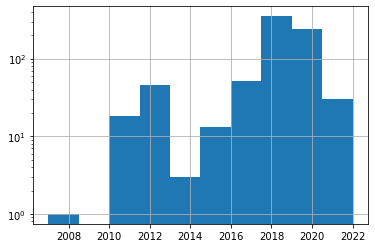

In [120]:
candidates_new['year'].hist(log=True)

In [121]:
len(candidates_new['unique_week'].unique())

66

In [122]:
len(candidates_new['owner'].unique())

63

In [123]:
len(candidates_new['neighbourhood'].unique())

1

#### Merging the translated texts back to a Revised version of text data

The data are merged back in the order of English, translated Italian, and translated other languages

In [124]:
rev = {}
keys_en = list(filter_dict_en.keys())
keys_cn = list(filter_dict_cn.keys())
keys_other = list(filter_dict_other.keys())
for i in range(len(filter_en)):
    if not filter_en[i] in rev:
        rev[filter_en[i]] = filter_dict_en[keys_en[i]]
    else:
        rev[filter_en[i]] = '. '.join([rev[filter_en[i]], filter_dict_en[keys_en[i]]])
        
for i in range(len(filter_cn)):
    if not filter_cn[i] in rev:
        rev[filter_cn[i]] = filter_dict_cn[keys_cn[i]]
    else:
        rev[filter_cn[i]] = '. '.join([rev[filter_cn[i]], filter_dict_cn[keys_cn[i]]])
        
for i in range(len(filter_other)):
    if not filter_other[i] in rev:
        rev[filter_other[i]] = filter_dict_other[keys_other[i]]
    else:
        rev[filter_other[i]] = '. '.join([rev[filter_other[i]], filter_dict_other[keys_other[i]]])

In [125]:
candidates_new['revised_text'] = pd.Series(rev)

In [126]:
candidates_new['text_len'] = candidates_new['revised_text'].apply(lambda x: len(x.split()))
candidates_new['num_sent'] = candidates_new['revised_text'].apply(lambda x: len(x.split('. ')))

Distribution of words per sentence and sentences per data point

<AxesSubplot:>

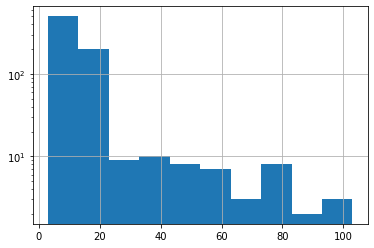

In [127]:
candidates_new['text_len'].hist(log=True)

<AxesSubplot:>

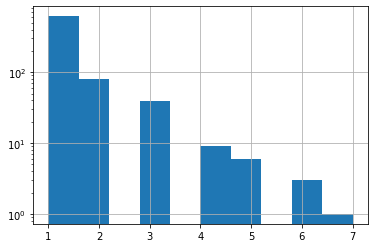

In [128]:
candidates_new['num_sent'].hist(log=True)

In [129]:
candidates_new

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,time,week,unique_week,text_data,Chinese,English,Other_Lang,revised_text,text_len,num_sent
8,51859675789,1.0,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,57210421@N04,"Beijing, China",灭渡桥,,...,2022-02-03 13:33:40,5,202205,. It has title ...,1,0,0,It has title of Extinction Bridge,6,1
13,51858385192,1.0,https://live.staticflickr.com/65535/5185838519...,https://live.staticflickr.com/65535/5185838519...,https://live.staticflickr.com/65535/5185838519...,https://live.staticflickr.com/65535/5185838519...,57210421@N04,"Beijing, China",下津桥,,...,2022-02-03 14:24:46,5,202205,. It has title ...,1,0,0,It has title of Shimotsu Bridge,6,1
4111,27910400829,1.0,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,127423136@N05,NaN,"Corridor, Hanshan Temple - Suzhou, China",OLYMPUS DIGITAL CAMERA,...,2018-01-05 12:08:29,1,201801,OLYMPUS DIGITAL CAMERA. It has title of Corrid...,0,1,0,"It has title of Corridor, Hanshan Temple - Suz...",19,2
16,51858384372,1.0,https://live.staticflickr.com/65535/5185838437...,https://live.staticflickr.com/65535/5185838437...,https://live.staticflickr.com/65535/5185838437...,https://live.staticflickr.com/65535/5185838437...,57210421@N04,"Beijing, China",上津桥,,...,2022-02-03 14:41:14,5,202205,. It has title ...,1,0,0,It has title of Shangjin Bridge,6,1
4116,38919131931,1.0,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,95645163@N00,Milan,IMG_6925,,...,2017-08-22 13:41:19,34,201734,. It has title of IMG_6925. It has tags of suz...,0,0,1,"It has tags of suzhoushi, jiangsusheng, china, cn",8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,26221985087,1.0,https://live.staticflickr.com/885/26221985087_...,https://live.staticflickr.com/885/26221985087_...,https://live.staticflickr.com/885/26221985087_...,https://live.staticflickr.com/885/26221985087_...,152311060@N02,"Tuxedo Park, USA",Freshmen go to China,,...,2018-03-20 11:59:52,12,201812,. It has title of Freshmen go to China. It has...,0,1,0,It has title of Freshmen go to China,8,1
4078,41140126964,1.0,https://live.staticflickr.com/948/41140126964_...,https://live.staticflickr.com/948/41140126964_...,https://live.staticflickr.com/948/41140126964_...,https://live.staticflickr.com/948/41140126964_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10816,,...,2018-04-21 13:57:48,16,201816,. It has title of DSC_20180421_10816. It has t...,0,0,1,"It has tags of china, places",6,1
4079,41814418522,1.0,https://live.staticflickr.com/957/41814418522_...,https://live.staticflickr.com/957/41814418522_...,https://live.staticflickr.com/957/41814418522_...,https://live.staticflickr.com/957/41814418522_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10818,,...,2018-04-21 13:58:53,16,201816,. It has title of DSC_20180421_10818. It has t...,0,0,1,"It has tags of china, places",6,1
4080,41140126144,1.0,https://live.staticflickr.com/864/41140126144_...,https://live.staticflickr.com/864/41140126144_...,https://live.staticflickr.com/864/41140126144_...,https://live.staticflickr.com/864/41140126144_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10825,,...,2018-04-21 14:01:20,16,201816,. It has title of DSC_20180421_10825. It has t...,0,1,0,"It has tags of china, family, pedro, people, p...",9,1


#### Merging the Revised Text data back to the full Dataset

Merging first back to the subset with text data and copy revised text data to the duplicates

In [130]:
cols_to_use = candidates_new.columns.difference(df_new.columns)
new = df_new.merge(candidates_new[cols_to_use], left_index=True, right_index=True, how='left')

In [131]:
text_dict = {}
for i in range(len(new)):
    if new.iloc[i]['text_data'] not in text_dict:
        text_dict[new.iloc[i]['text_data']] = new.iloc[i]['revised_text']

In [132]:
new['revised_text'] = new['text_data'].apply(lambda x: text_dict[x])

1405 data points have a text data field, but do not have a revised text data field, since the texts they have are *invalid*

In [133]:
new[new['revised_text'].isna()]

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,time,week,unique_week,text_data,Chinese,English,Other_Lang,num_sent,revised_text,text_len
125,51836197137,1.0,https://live.staticflickr.com/65535/5183619713...,https://live.staticflickr.com/65535/5183619713...,https://live.staticflickr.com/65535/5183619713...,https://live.staticflickr.com/65535/5183619713...,193769199@N05,NaN,43B06C03-0A8C-4670-AA3D-1BF034F6B322_1_105_c,,...,2021-03-20 20:10:55,11,202111,. It has title of 43B06C03-0A8C-4670-AA3D-1BF0...,NaN,NaN,NaN,NaN,NaN,NaN
126,51837499654,1.0,https://live.staticflickr.com/65535/5183749965...,https://live.staticflickr.com/65535/5183749965...,https://live.staticflickr.com/65535/5183749965...,https://live.staticflickr.com/65535/5183749965...,193769199@N05,NaN,936635AE-45E9-4078-9DC8-4854241288C2_1_105_c,,...,2021-03-20 18:19:52,11,202111,. It has title of 936635AE-45E9-4078-9DC8-4854...,NaN,NaN,NaN,NaN,NaN,NaN
127,51837879515,1.0,https://live.staticflickr.com/65535/5183787951...,https://live.staticflickr.com/65535/5183787951...,https://live.staticflickr.com/65535/5183787951...,https://live.staticflickr.com/65535/5183787951...,193769199@N05,NaN,4894AD62-54A5-42C3-8BD6-9EDB9C1D0414_1_105_c,,...,2021-03-20 18:16:18,11,202111,. It has title of 4894AD62-54A5-42C3-8BD6-9EDB...,NaN,NaN,NaN,NaN,NaN,NaN
128,51837147936,1.0,https://live.staticflickr.com/65535/5183714793...,https://live.staticflickr.com/65535/5183714793...,https://live.staticflickr.com/65535/5183714793...,https://live.staticflickr.com/65535/5183714793...,193769199@N05,NaN,3F886916-F7F9-4723-82DE-20F3C4DF2C40_1_105_c,,...,2021-03-20 17:18:39,11,202111,. It has title of 3F886916-F7F9-4723-82DE-20F3...,NaN,NaN,NaN,NaN,NaN,NaN
129,51837879165,1.0,https://live.staticflickr.com/65535/5183787916...,https://live.staticflickr.com/65535/5183787916...,https://live.staticflickr.com/65535/5183787916...,https://live.staticflickr.com/65535/5183787916...,193769199@N05,NaN,057F3E9D-C4AA-4454-A214-31EF82EB31AB_1_105_c,,...,2021-03-20 15:58:25,11,202111,. It has title of 057F3E9D-C4AA-4454-A214-31EF...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,38397950826,1.0,https://live.staticflickr.com/4578/38397950826...,https://live.staticflickr.com/4578/38397950826...,https://live.staticflickr.com/4578/38397950826...,https://live.staticflickr.com/4578/38397950826...,28571579@N03,NaN,20171112_IMG_0514,,...,2017-11-12 19:32:22,45,201745,. It has title of 20171112_IMG_0514. It has ta...,NaN,NaN,NaN,NaN,NaN,NaN
4225,38397950426,1.0,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,28571579@N03,NaN,20171112_IMG_0515,,...,2017-11-12 19:33:08,45,201745,. It has title of 20171112_IMG_0515. It has ta...,NaN,NaN,NaN,NaN,NaN,NaN
4226,38397948496,1.0,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,28571579@N03,NaN,20171112_IMG_0518,,...,2017-11-12 19:33:52,45,201745,. It has title of 20171112_IMG_0518. It has ta...,NaN,NaN,NaN,NaN,NaN,NaN
4227,38454117381,1.0,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,28571579@N03,NaN,20171112_IMG_0531,,...,2017-11-12 19:40:39,45,201745,. It has title of 20171112_IMG_0531. It has ta...,NaN,NaN,NaN,NaN,NaN,NaN


Merging then back to the full dataset

In [134]:
cols_to_use = new.columns.difference(df.columns)
final_df = df.merge(new[cols_to_use], left_index=True, right_index=True, how='left')

In [135]:
final_df

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,time,week,unique_week,Chinese,English,Other_Lang,num_sent,revised_text,text_data,text_len
8,51859675789,1.0,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,https://live.staticflickr.com/65535/5185967578...,57210421@N04,"Beijing, China",灭渡桥,,...,2022-02-03 13:33:40,5,202205,1.0,0.0,0.0,1.0,It has title of Extinction Bridge,. It has title ...,6.0
9,51859339946,1.0,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,https://live.staticflickr.com/65535/5185933994...,57210421@N04,"Beijing, China",灭渡桥,,...,2022-02-03 13:34:07,5,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN
10,51858385807,1.0,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,https://live.staticflickr.com/65535/5185838580...,57210421@N04,"Beijing, China",灭渡桥,,...,2022-02-03 13:34:18,5,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN
11,51859339546,1.0,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,https://live.staticflickr.com/65535/5185933954...,57210421@N04,"Beijing, China",灭渡桥,,...,2022-02-03 13:34:52,5,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN
12,51858385377,1.0,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,https://live.staticflickr.com/65535/5185838537...,57210421@N04,"Beijing, China",灭渡桥,,...,2022-02-03 13:38:02,5,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,38397950426,1.0,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,https://live.staticflickr.com/4582/38397950426...,28571579@N03,NaN,20171112_IMG_0515,NaN,...,2017-11-12 19:33:08,45,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0515. It has ta...,NaN
4226,38397948496,1.0,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,https://live.staticflickr.com/4517/38397948496...,28571579@N03,NaN,20171112_IMG_0518,NaN,...,2017-11-12 19:33:52,45,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0518. It has ta...,NaN
4227,38454117381,1.0,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,https://live.staticflickr.com/4552/38454117381...,28571579@N03,NaN,20171112_IMG_0531,NaN,...,2017-11-12 19:40:39,45,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0531. It has ta...,NaN
4228,38397940256,1.0,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,https://live.staticflickr.com/4576/38397940256...,28571579@N03,NaN,20171112_IMG_0539,NaN,...,2017-11-12 19:45:07,45,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0539. It has ta...,NaN


A few cases with super long text descriptions

In [137]:
final_df[final_df['num_sent']>5]['revised_text'].tolist()

["The Master of the Nets Garden (Chinese: 网师园) in Suzhou is among the finest gardens in China. It is recognized with other classical Suzhou gardens as a UNESCO World Heritage Site. The garden demonstrates Chinese garden designers' adept skills for synthesizing art, nature, and architecture to create unique metaphysical masterpieces. The Master of the Nets is particularly regarded among garden connoisseurs for its mastering the techniques of relative dimension, contrast, foil, sequence and depth, and borrowed scenery. It has title of Master of the Nets Garden 网师园. It has tags of sony vsco",
 'Suzhou, with its many canals and bridges, is often nicknamed the .Venice of the East. (although many other cities often also claim this title as well). Being very close to Shanghai has allowed it to become of the fastest growing cities in Mainland China. It is also a popular tourist destination with its many UNESCO sites and attractions, such as this one near Tiger Hill.. It has title of Reflection

### Creating a one-hot Embedding for frequent Tags

#### Generating a tag dictionary with appearance counts

With the tags of the complete dataset

In [138]:
tag_dict = {}
for i in final_df.index:
    list_now = final_df.loc[i]['tag_list']
    for w in list_now:
        if not w in tag_dict:
            tag_dict[w] = {}
            tag_dict[w]['count'] = 1
            tag_dict[w]['origin'] = [i]
        else:
            tag_dict[w]['count'] += 1
            tag_dict[w]['origin'].append(i)

Or alternatively, with the tags from the subset of unique and valid text data

In [140]:
tag_dict = {}
for i in candidates_new.index:
    list_now = candidates_new.loc[i]['tag_list']
    for w in list_now:
        if not w in tag_dict:
            tag_dict[w] = {}
            tag_dict[w]['count'] = 1
            tag_dict[w]['origin'] = [i]
        else:
            tag_dict[w]['count'] += 1
            tag_dict[w]['origin'].append(i)

In [141]:
len(tag_dict)

339

#### Converting tags to non-capitalized and translating tag words into English, if possible

In [142]:
tag_dict_en = {}
for k, v in tag_dict.items():
    w = GoogleTranslator(source='auto', target='en').translate(k.lower())
    if not w in tag_dict_en:
        tag_dict_en[w] = {}
        tag_dict_en[w]['count'] = v['count']
        tag_dict_en[w]['origin'] = set(v['origin'])
    else:
        tag_dict_en[w]['count'] += v['count']
        tag_dict_en[w]['origin'] = tag_dict_en[w]['origin'].union(set(v['origin']))

336 out of 339 tags remained after translating

In [143]:
len(tag_dict),len(tag_dict_en)

(339, 336)

#### Converting the tag dictionary to a pandas DataFrame

In [144]:
tag_df = pd.DataFrame(tag_dict_en).T.sort_values(by='count',ascending=False)

It could be observed that this tag distribution has a very long tail, and the most frequent tags are only referring to the place, which may need to be filtered out

In [145]:
tag_df.head(30)

,count,origin
china,672,"{4111, 4116, 4117, 2099, 2115, 2116, 2117, 211..."
Suzhou,543,"{4111, 108, 2901, 349, 350, 351, 2439, 2442, 3..."
jiangsu,293,"{3615, 3616, 3617, 3618, 3619, 3620, 3621, 550..."
peoplesrepublicofchina,217,"{3615, 3616, 3617, 3618, 3619, 3620, 3621, 550..."
garden,173,"{3615, 3616, 4129, 3617, 3618, 3619, 3620, 362..."
unescoworldheritage,144,"{3615, 3616, 3617, 3618, 3619, 3620, 3621, 362..."
classicalgardens,133,"{3615, 3616, 3617, 3618, 3619, 3620, 3621, 362..."
suzhoushi,60,"{768, 781, 784, 785, 658, 787, 660, 4116, 4117..."
jiangsusheng,60,"{768, 781, 784, 785, 658, 787, 660, 4116, 4117..."
places,60,"{3840, 3841, 3842, 3843, 3844, 3845, 3846, 384..."


In [156]:
tag_df.tail(30)

,count,origin
mobile,1,{897}
phone,1,{897}
merchant,1,{900}
hp,1,{2740}
pushedfilm,1,{2740}
geometry,1,{613}
iphonex,1,{621}
symmetry,1,{613}
Impe,1,{613}
modernist,1,{613}


<AxesSubplot:>

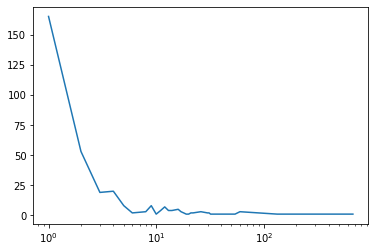

In [146]:
tag_df['count'].value_counts().sort_index().plot(logx=True)

#### Deciding on the dimension of the embedding

The number of 2 seems to provide an elbow point for the remained tags for embedding

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\461701484.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs.append(len(tag_df[tag_df['count']>i][tag_df['count']<200]))


<AxesSubplot:>

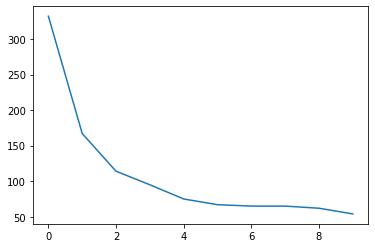

In [147]:
xs = []
for i in range(10):
    xs.append(len(tag_df[tag_df['count']>i][tag_df['count']<200]))
pd.Series(xs).plot()

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\1747741503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tag_df[tag_df['count']>2][tag_df['count']<200]['count'].value_counts().sort_index().plot()


<AxesSubplot:>

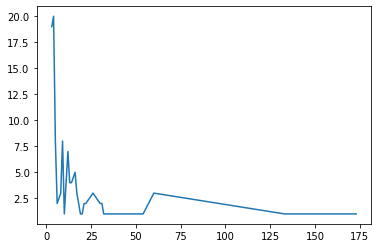

In [152]:
tag_df[tag_df['count']>2][tag_df['count']<200]['count'].value_counts().sort_index().plot()

A total of 366 tags remained in the embedding after filtering

In [160]:
tag_emb = tag_df[tag_df['count']>2][tag_df['count']<200]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\3256382964.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tag_emb = tag_df[tag_df['count']>2][tag_df['count']<200]


In [161]:
tag_emb['edge_l'] = tag_emb['origin'].apply(lambda x: list(x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_26468\1866734054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_emb['edge_l'] = tag_emb['origin'].apply(lambda x: list(x))


In [162]:
tag_emb

,count,origin,edge_l
garden,173,"{3615, 3616, 4129, 3617, 3618, 3619, 3620, 362...","[3615, 3616, 4129, 3617, 3618, 3619, 3620, 362..."
unescoworldheritage,144,"{3615, 3616, 3617, 3618, 3619, 3620, 3621, 362...","[3615, 3616, 3617, 3618, 3619, 3620, 3621, 362..."
classicalgardens,133,"{3615, 3616, 3617, 3618, 3619, 3620, 3621, 362...","[3615, 3616, 3617, 3618, 3619, 3620, 3621, 362..."
suzhoushi,60,"{768, 781, 784, 785, 658, 787, 660, 4116, 4117...","[768, 781, 784, 785, 658, 787, 660, 4116, 4117..."
jiangsusheng,60,"{768, 781, 784, 785, 658, 787, 660, 4116, 4117...","[768, 781, 784, 785, 658, 787, 660, 4116, 4117..."
...,...,...,...
gate,3,"{504, 3450, 2444}","[504, 3450, 2444]"
lantern,3,"{1018, 3004, 2446}","[1018, 3004, 2446]"
administrators,3,"{2819, 395, 502}","[2819, 395, 502]"
bw,3,"{395, 621, 4013}","[395, 621, 4013]"


#### Constructing a Bipartite Graph for effective mapping of tag embedding

In [163]:
import networkx as nx

In [164]:
G=nx.from_dict_of_lists(tag_emb.to_dict()['edge_l'])

In [165]:
nx.is_bipartite(G)

True

In [166]:
emb_temp = nx.to_pandas_adjacency(G, dtype=int)

Filter out the tags with only one letter would result a tag embedding dimension of 107

In [167]:
tags = list(tag_emb.index)

In [182]:
tags_n = [w for w in tags if len(w)>2]

In [183]:
len(pd.Series(tags_n).apply(lambda x : x.lower()).unique())

107

In [184]:
tags_n

['garden',
 'unescoworldheritage',
 'classicalgardens',
 'suzhoushi',
 'jiangsusheng',
 'places',
 'gardenofthehumbleadministrator',
 'humble',
 'administrator',
 'zhu',
 'lingering',
 'at the',
 'liongrove',
 'culture',
 'arts',
 'centre',
 'mercurytours',
 'harryandrowenaphotos',
 'street',
 'temple',
 'jeans',
 'pagoda',
 'shanghai',
 'hangzhou',
 'chinese',
 'masterofnetsgarden',
 'people',
 'masterofthenets',
 'north',
 'central',
 'square',
 'jinji',
 'lake',
 'sony',
 'plaza',
 'pingjiang',
 'center',
 'couple',
 'retreat',
 'water',
 'museum',
 'city',
 'house',
 'pavilion',
 'asia',
 'canglang',
 'keyuan',
 'greatwave',
 'photography',
 'decoration',
 'asian',
 'december',
 'peoples',
 'prc',
 'architecture',
 'canal',
 'republic',
 'building',
 'trees',
 'candid',
 'reflection',
 'shantang',
 'fuji',
 'river',
 'wall',
 'red',
 'landscape',
 'pond',
 'tree',
 'east',
 'green',
 'art',
 'plants',
 'architectural',
 'film',
 'humbleadministratorgarden',
 'tiger',
 'vsco',
 'pro

#### Tags embedding for data samples

As results, the 107-dimensional tags embedding could be mapped back to 1104 data points. Note that the duplicated data points in terms of text data are not considered.

In [185]:
tags_emb = emb_temp.loc[tags_n].T.loc[~emb_temp.index.isin(tags)].sort_index()

In [186]:
tags_emb

,garden,unescoworldheritage,classicalgardens,suzhoushi,jiangsusheng,places,gardenofthehumbleadministrator,humble,administrator,zhu,...,China,electric,hotel,shops,monochrome,hanshan,gate,lantern,administrators,fujifilmxf
108,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
132,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4116,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4117,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
tags_VEC = tags_emb.apply(lambda x: np.array(x), axis=1).rename('VECTOR')

In [188]:
tags_VEC

108     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
132     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
135     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
361     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
363     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4082    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4111    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4116    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4117    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4129    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: VECTOR, Length: 555, dtype: object

#### A subset with complet tag embeddings

In [189]:
sub = final_df.merge(tags_VEC, how='right', left_index=True, right_index=True)

In [190]:
sub

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,week,unique_week,Chinese,English,Other_Lang,num_sent,revised_text,text_data,text_len,VECTOR
108,51273169730,1.0,https://live.staticflickr.com/65535/5127316973...,https://live.staticflickr.com/65535/5127316973...,https://live.staticflickr.com/65535/5127316973...,https://live.staticflickr.com/65535/5127316973...,63829447@N04,NaN,NaN,Couple Garden,...,41,201041,0.0,0.0,1.0,1.0,"It has tags of china, china, chinese, garden, ...",Couple Garden. It has title of . It has tags o...,10.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
132,51630786278,1.0,https://live.staticflickr.com/65535/5163078627...,https://live.staticflickr.com/65535/5163078627...,https://live.staticflickr.com/65535/5163078627...,https://live.staticflickr.com/65535/5163078627...,193550492@N08,NaN,Tetrahedral shadow and rockery,NaN,...,26,201526,0.0,1.0,1.0,2.0,It has title of Tetrahedral shadow and rockery...,. It has title of Tetrahedral shadow and rocke...,13.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
135,51399368631,1.0,https://live.staticflickr.com/65535/5139936863...,https://live.staticflickr.com/65535/5139936863...,https://live.staticflickr.com/65535/5139936863...,https://live.staticflickr.com/65535/5139936863...,193550492@N08,NaN,Scene in a Circle in a Circle,Chinese Gardening,...,26,201526,0.0,1.0,1.0,2.0,It has title of Scene in a Circle in a Circle....,Chinese Gardening. It has title of Scene in a ...,16.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
361,51089471766,1.0,https://live.staticflickr.com/65535/5108947176...,https://live.staticflickr.com/65535/5108947176...,https://live.staticflickr.com/65535/5108947176...,https://live.staticflickr.com/65535/5108947176...,44934278@N04,"Beijing, China",Canglang Pavilion 沧浪亭,"The Canglang Pavilion (沧浪亭), variously transla...",...,12,202112,0.0,1.0,1.0,4.0,"The Canglang Pavilion (沧浪亭), variously transla...","The Canglang Pavilion (沧浪亭), variously transla...",60.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
363,51089471666,1.0,https://live.staticflickr.com/65535/5108947166...,https://live.staticflickr.com/65535/5108947166...,https://live.staticflickr.com/65535/5108947166...,https://live.staticflickr.com/65535/5108947166...,44934278@N04,"Beijing, China",Master of the Nets Garden 网师园,The Master of the Nets Garden (Chinese: 网师园) i...,...,12,202112,0.0,1.0,1.0,6.0,The Master of the Nets Garden (Chinese: 网师园) i...,The Master of the Nets Garden (Chinese: 网师园) i...,93.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,41857278401,1.0,https://live.staticflickr.com/958/41857278401_...,https://live.staticflickr.com/958/41857278401_...,https://live.staticflickr.com/958/41857278401_...,https://live.staticflickr.com/958/41857278401_...,7287512@N02,"Kokomo, IN, USA",DSC_20180421_10836,NaN,...,16,201816,0.0,0.0,1.0,1.0,"It has tags of china, places",. It has title of DSC_20180421_10836. It has t...,6.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4111,27910400829,1.0,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,https://live.staticflickr.com/4751/27910400829...,127423136@N05,NaN,"Corridor, Hanshan Temple - Suzhou, China",OLYMPUS DIGITAL CAMERA,...,1,201801,0.0,1.0,0.0,2.0,"It has title of Corridor, Hanshan Temple - Suz...",OLYMPUS DIGITAL CAMERA. It has title of Corrid...,19.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4116,38919131931,1.0,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,https://live.staticflickr.com/4544/38919131931...,95645163@N00,Milan,IMG_6925,NaN,...,34,201734,0.0,0.0,1.0,1.0,"It has tags of suzhoushi, jiangsusheng, china, cn",. It has title of IMG_6925. It has tags of suz...,8.0,"

### Save the Datasets generated

In [176]:
sentences.to_csv('Suzhou/data_storage/sentences.csv',sep='\t')

In [177]:
candidates_new.to_csv('Suzhou/data_storage/metadata_unique_text.csv',sep='\t')

In [178]:
final_df.to_csv('Suzhou/data_storage/metadata.csv',sep='\t')

In [191]:
tags_emb.to_csv('Suzhou/data_storage/tags_embedding.csv',sep='\t')

In [192]:
sub.to_csv('Suzhou/data_storage/meta_with_tags.csv',sep='\t')

### Comparing the Tag Embedding

In [196]:
tags_emb_V = pd.read_csv('Venezia/data_storage/tags_embedding.csv',sep='\t', index_col='Unnamed: 0')

In [199]:
tags_V = set(tags_emb_V.columns)

In [200]:
tags_S = set(tags_n)

In [201]:
tags_V.intersection(tags_S)

{'architecture',
 'art',
 'building',
 'canal',
 'canon',
 'city',
 'family',
 'film',
 'fuji movie',
 'garden',
 'green',
 'house',
 'landscape',
 'man',
 'monochrome',
 'museum',
 'nature',
 'night',
 'people',
 'photography',
 'places',
 'red',
 'reflection',
 'river',
 'sony',
 'square',
 'street',
 'unescoworldheritagesite',
 'wall',
 'water'}